# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [ ]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ruta = "/content/drive/MyDrive/Entregable_MachineLearning/Clasificacion/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

Conociendo las variables numericas y categoricas:


###Variable categorica:

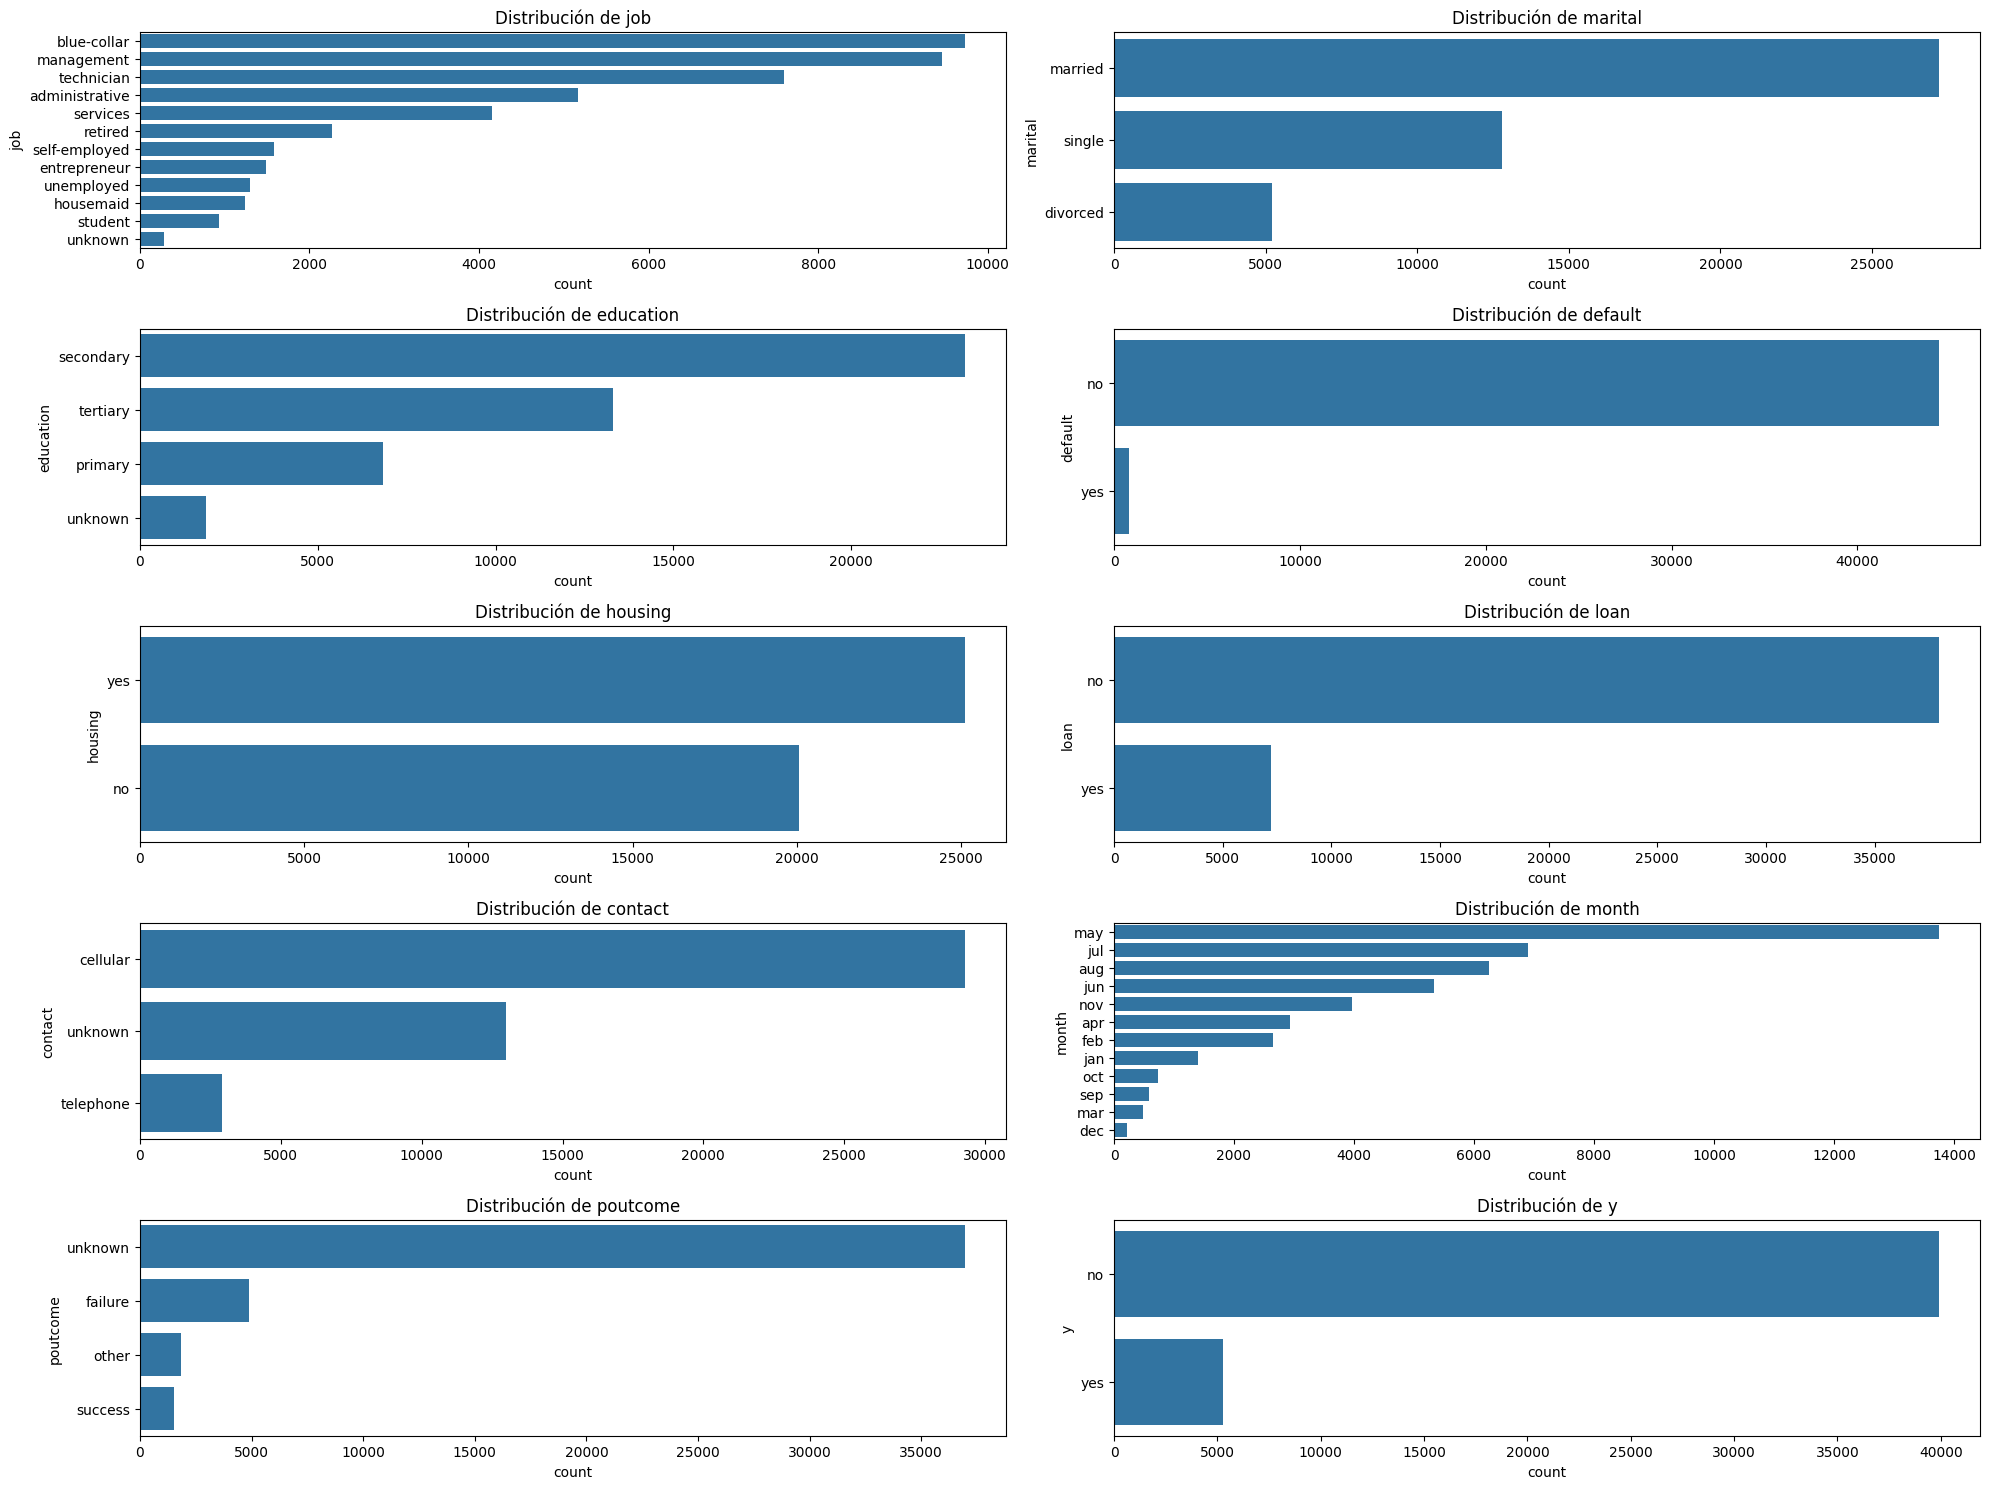

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'data' es tu DataFrame y ya lo tienes cargado
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Configura el tamaño de la figura para acomodar los subplots
plt.figure(figsize=(20, 15))

# Crea un gráfico de barras para cada variable categórica
for i, col in enumerate(cols_cat):
    plt.subplot(5, 2, i + 1)  # Ajusta las dimensiones según la cantidad de variables categóricas
    sns.countplot(y=col, data=data, order = data[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

Niveles de cada variable categorica:

* 'job': 12 subcatergorias
* 'marital': 3 subcatergorias
* 'education': 4 subcatergorias
* 'default': 2 subcatergorias
* 'housing': 2 subcatergorias
* 'loan' : 2 subcatergorias
* 'contact': 3 subcatergorias
* 'month': 12 subcatergorias  (1 año)
* 'poutcome':4 subcatergorias
* 'y': 2 subcatergorias

Una vez analizado las variables y teniendo en cuenta el objetivo del estudio, se borran columnas que no son necesarias:


In [ ]:
data.drop(columns=['contact' , 'month' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous'], inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

###Variable Numericas:


In [ ]:
data.describe()
data.head()

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no


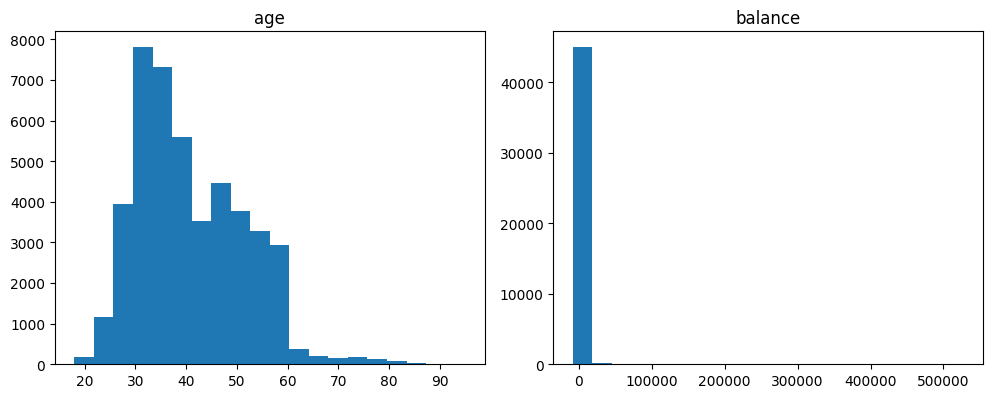

In [ ]:
import matplotlib.pyplot as plt

# Filtrar las columnas numéricas para los histogramas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Configurar el tamaño de la figura para acomodar los histogramas
plt.figure(figsize=(20, 15))

# Generar histogramas para cada columna numérica
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Ajustar el número de filas y columnas según sea necesario
    plt.hist(data[col].dropna(), bins=20)
    plt.title(col)

# Ajustar el layout y mostrar los histogramas
plt.tight_layout()
plt.show()

##2. Análisis univariado: relación de cada variable predictora con la variable a predecir

Comprendiendo la distribucion de la variable objetivo 'y':

In [ ]:
data['y'].value_counts(normalize=True)


no     0.883047
yes    0.116953
Name: y, dtype: float64

In [ ]:
# Conteo de instancias únicas en la variable objetivo 'y'
conteo_y = data['y'].value_counts()

conteo_y

no     39904
yes     5285
Name: y, dtype: int64

In [ ]:
# Estadísticas descriptivas para las variables numéricas, separadas por la variable objetivo 'y'
stats_descriptivas = data.groupby('y').agg(['mean', 'std'])

# Seleccionar solo las columnas numéricas para el análisis
cols_num = ['age', 'balance']
stats_descriptivas_num = stats_descriptivas[cols_num]

stats_descriptivas_num

<ipython-input-33-f35b13c70508>:2: FutureWarning: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  stats_descriptivas = data.groupby('y').agg(['mean', 'std'])


age                 balance             
          mean        std         mean          std
y                                                  
no   40.839891  10.173157  1317.011478  3973.460509
yes  41.665468  13.494304  1804.391485  3502.278416

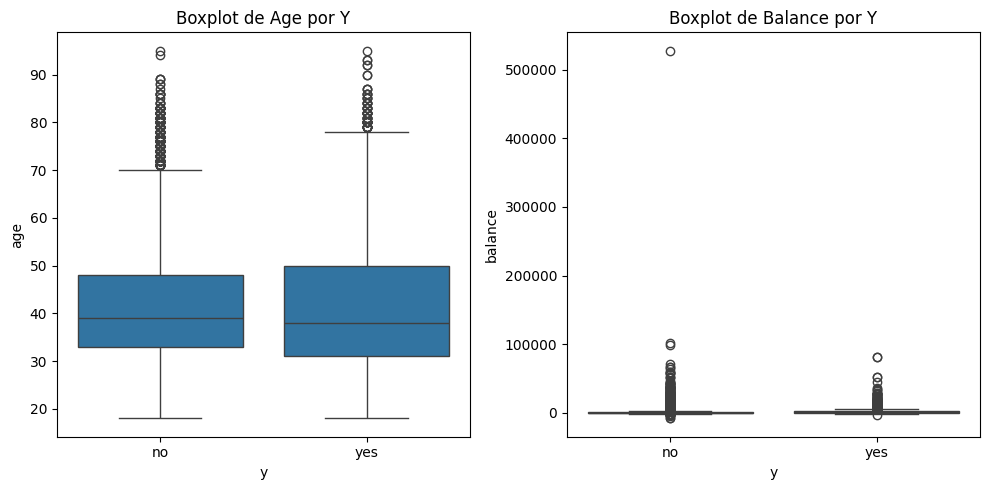

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar tamaño de figura para visualización adecuada
plt.figure(figsize=(10, 5))

# Boxplot para 'age'
plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='age', data=data)
plt.title('Boxplot de Age por Y')

# Boxplot para 'balance'
plt.subplot(1, 2, 2)
sns.boxplot(x='y', y='balance', data=data)
plt.title('Boxplot de Balance por Y')

plt.tight_layout()
plt.show()


Observaciones:
* La edad media de los clientes que suscribieron un depósito es ligeramente mayor (41.6) que la de aquellos que no lo hicieron (40.8).
* Balance (balance): Los clientes que suscribieron un depósito tienen en promedio un balance más alto (1.804) que aquellos que no (1.317).

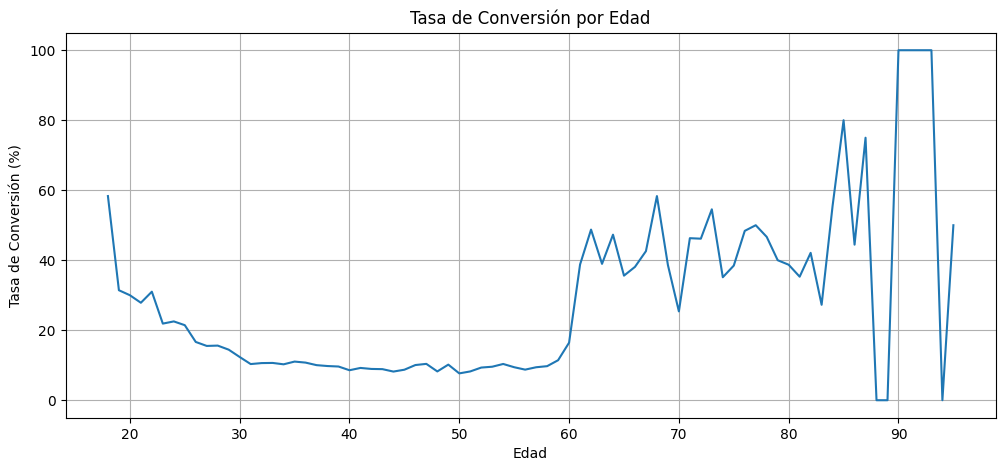

In [ ]:
# Agrupar por edad y calcular la tasa de conversión
tasa_conversion_edad = data.groupby('age')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})

# Reseteamos el índice para trabajar con 'age' como una columna
tasa_conversion_edad.reset_index(inplace=True)

# Graficar la tasa de conversión por edad
plt.figure(figsize=(12, 5))
sns.lineplot(x='age', y='tasa_conversion', data=tasa_conversion_edad)
plt.title('Tasa de Conversión por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Conversión (%)')
plt.grid(True)
plt.show()


<ipython-input-47-e7874fb7aada>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='balance_range_nuevo', y='tasa_conversion', data=tasa_conversion_balance_nuevo, palette='coolwarm')


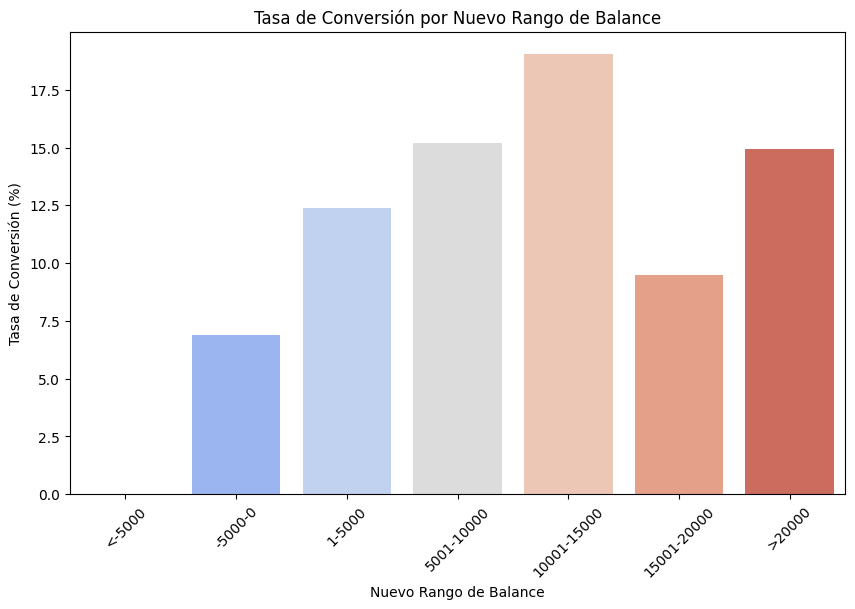

In [ ]:
# Definir nuevos rangos para 'balance', esta vez con intervalos de 5000
bins_nuevos = [-float('inf')] + list(range(-5000, 20001, 5000)) + [float('inf')]
labels_nuevos = ['<-5000', '-5000-0', '1-5000', '5001-10000', '10001-15000', '15001-20000', '>20000']
data['balance_range_nuevo'] = pd.cut(data['balance'], bins=bins_nuevos, labels=labels_nuevos)

# Agrupar por el nuevo rango de 'balance' y calcular la tasa de conversión
tasa_conversion_balance_nuevo = data.groupby('balance_range_nuevo')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})

# Reseteamos el índice para trabajar con 'balance_range_nuevo' como una columna
tasa_conversion_balance_nuevo.reset_index(inplace=True)

# Graficar la tasa de conversión por el nuevo rango de 'balance'
plt.figure(figsize=(10, 6))
sns.barplot(x='balance_range_nuevo', y='tasa_conversion', data=tasa_conversion_balance_nuevo, palette='coolwarm')
plt.title('Tasa de Conversión por Nuevo Rango de Balance')
plt.xlabel('Nuevo Rango de Balance')
plt.ylabel('Tasa de Conversión (%)')
plt.xticks(rotation=45)
plt.show()



Los rangos de saldo con mayor tasa de conversion son 10.000 a 15.000 aprox 20% y 5.001 a 10.000 con 15%

<ipython-input-48-a1d67b24058c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='job', data=tasa_conversion_job, palette='coolwarm')
<ipython-input-48-a1d67b24058c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='marital', data=tasa_conversion_marital, palette='coolwarm')


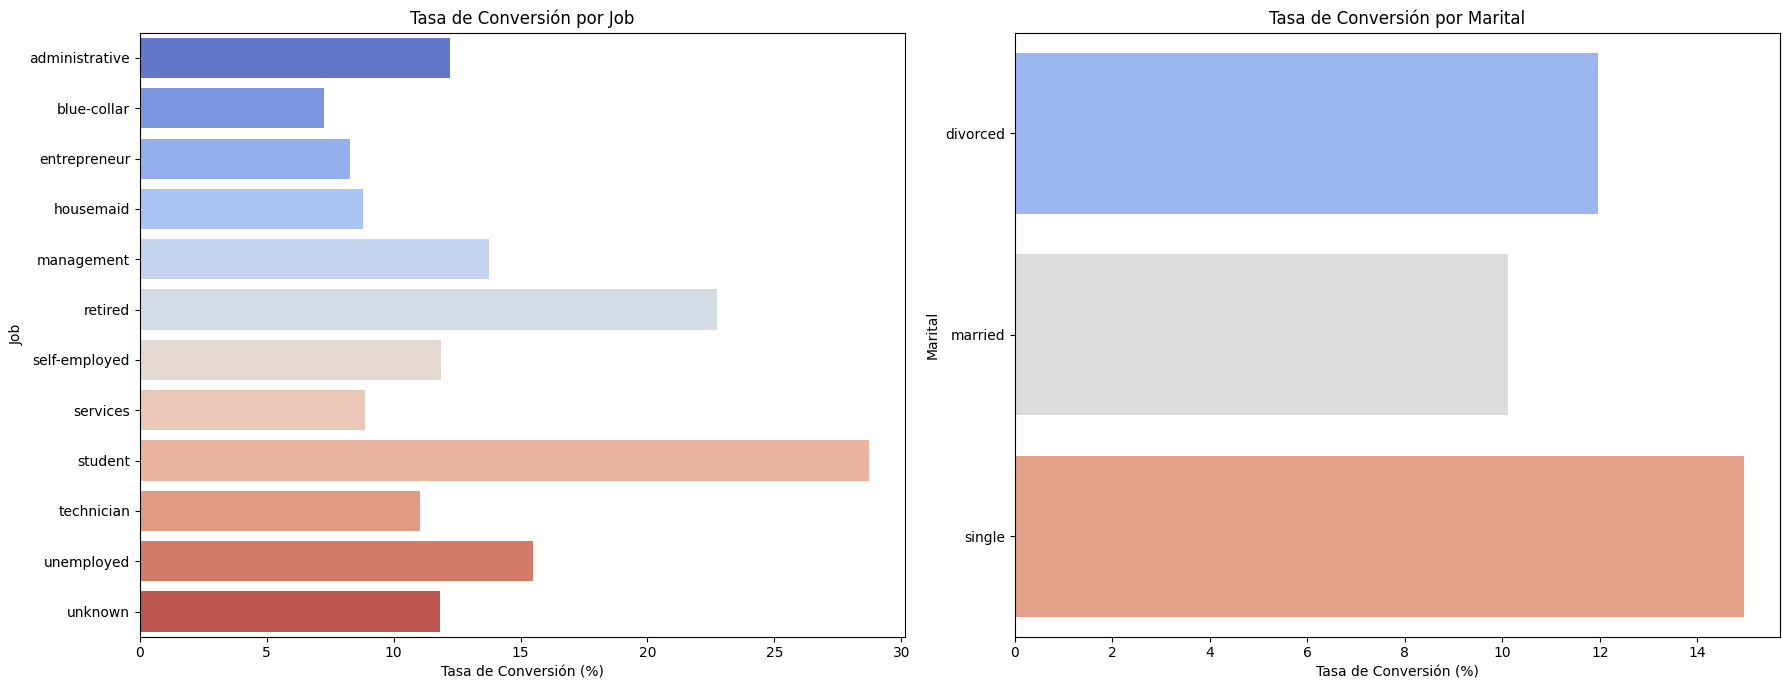

In [ ]:
# Tasa de conversión por 'job'
tasa_conversion_job = data.groupby('job')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_job.reset_index(inplace=True)

# Tasa de conversión por 'marital'
tasa_conversion_marital = data.groupby('marital')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_marital.reset_index(inplace=True)

# Graficar la tasa de conversión por 'job'
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='tasa_conversion', y='job', data=tasa_conversion_job, palette='coolwarm')
plt.title('Tasa de Conversión por Job')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('Job')

# Graficar la tasa de conversión por 'marital'
plt.subplot(1, 2, 2)
sns.barplot(x='tasa_conversion', y='marital', data=tasa_conversion_marital, palette='coolwarm')
plt.title('Tasa de Conversión por Marital')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('Marital')

plt.tight_layout()
plt.show()


<ipython-input-50-6c48d7ee45f3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='education', data=tasa_conversion_education, ax=axs[0], palette='coolwarm')
<ipython-input-50-6c48d7ee45f3>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='housing', data=tasa_conversion_housing, ax=axs[1], palette='coolwarm')
<ipython-input-50-6c48d7ee45f3>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='loan', data=tasa_conversion_loan, ax=axs[2], palette='coolwarm')


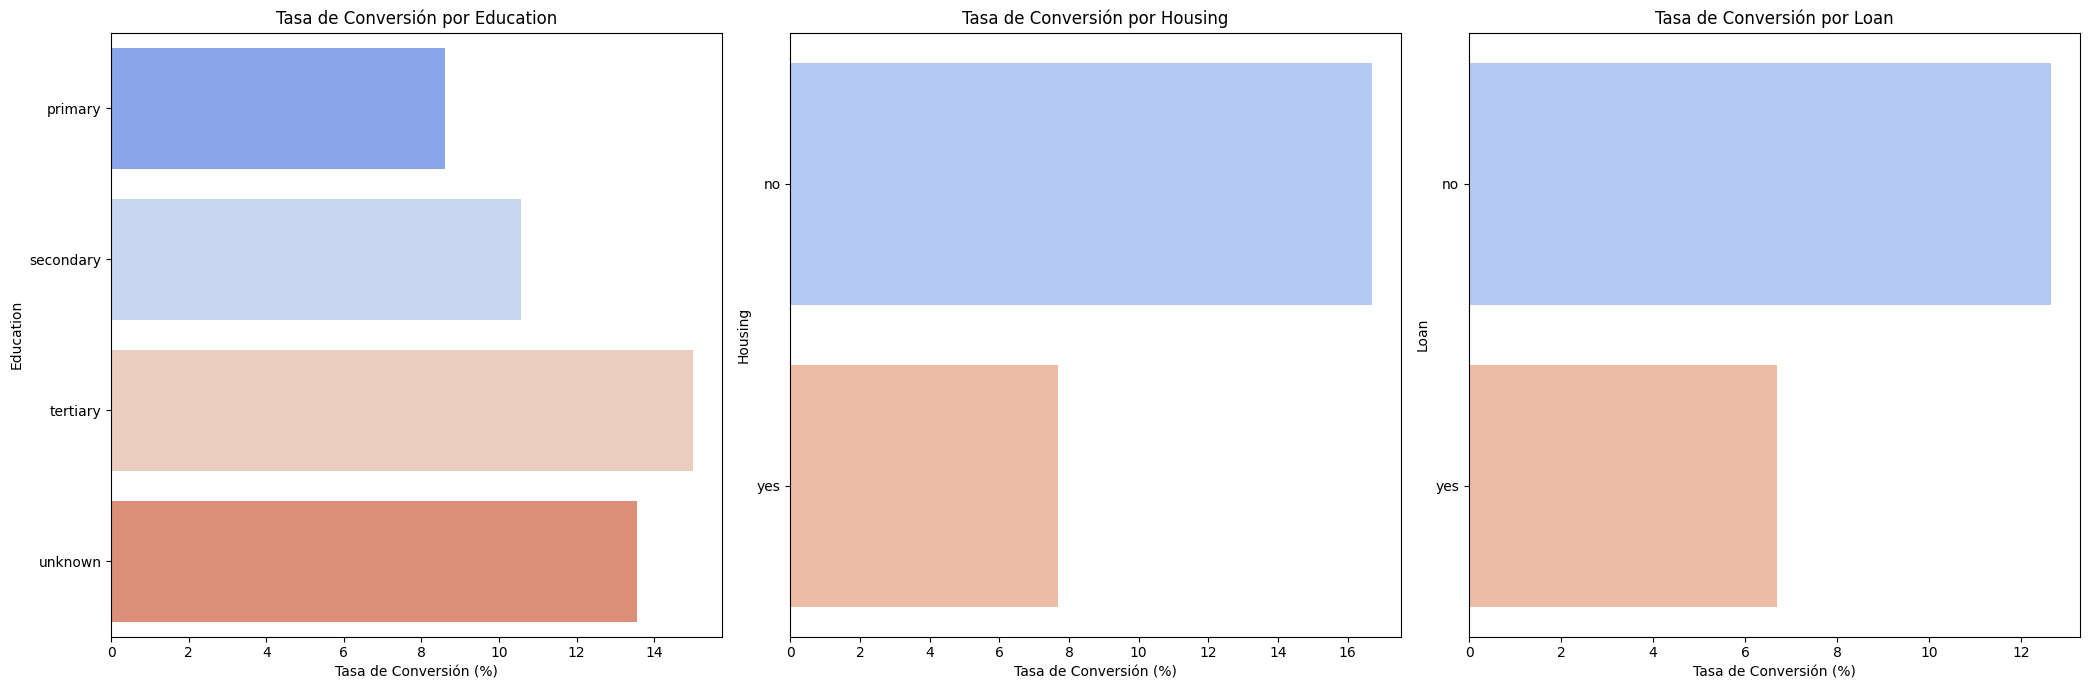

In [ ]:
# Tasa de conversión por 'education'
tasa_conversion_education = data.groupby('education')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_education.reset_index(inplace=True)

# Tasa de conversión por 'housing'
tasa_conversion_housing = data.groupby('housing')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_housing.reset_index(inplace=True)

# Tasa de conversión por 'loan'
tasa_conversion_loan = data.groupby('loan')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_loan.reset_index(inplace=True)

# Graficar la tasa de conversión para 'education', 'housing', 'loan'
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

sns.barplot(x='tasa_conversion', y='education', data=tasa_conversion_education, ax=axs[0], palette='coolwarm')
axs[0].set_title('Tasa de Conversión por Education')
axs[0].set_xlabel('Tasa de Conversión (%)')
axs[0].set_ylabel('Education')

sns.barplot(x='tasa_conversion', y='housing', data=tasa_conversion_housing, ax=axs[1], palette='coolwarm')
axs[1].set_title('Tasa de Conversión por Housing')
axs[1].set_xlabel('Tasa de Conversión (%)')
axs[1].set_ylabel('Housing')

sns.barplot(x='tasa_conversion', y='loan', data=tasa_conversion_loan, ax=axs[2], palette='coolwarm')
axs[2].set_title('Tasa de Conversión por Loan')
axs[2].set_xlabel('Tasa de Conversión (%)')
axs[2].set_ylabel('Loan')

plt.tight_layout()
plt.show()


* Conversión varía según el nivel educativo de los clientes, lo que podría indicar que la educación juega un papel en la decisión de invertir; los clientes con educacion terciaria tienen un nivel de conversion sobre el 16% aprox.
* Conversión por Housing: La presencia o ausencia de un préstamo hipotecario también parece influir en la tasa de conversión, lo cual es útil para entender las prioridades financieras de los clientes.
* Conversión por Loan: Si el cliente tiene o no un préstamo personal afecta su probabilidad de suscribir un depósito a plazo. Los clientes que NO tienen prestamo duplican en tasa de conversion respecto a los que si poseen credito.

<ipython-input-52-3cfb7538b6b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_conversion', y='poutcome', data=tasa_conversion_poutcome, palette='coolwarm')


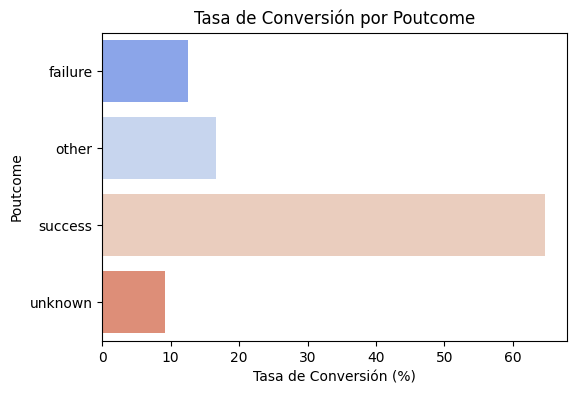

In [ ]:
# Tasa de conversión por 'poutcome'
tasa_conversion_poutcome = data.groupby('poutcome')['y'].agg(['count', lambda x: (x == 'yes').mean() * 100]).rename(columns={'count': 'total', '<lambda_0>': 'tasa_conversion'})
tasa_conversion_poutcome.reset_index(inplace=True)

# Graficar la tasa de conversión para 'poutcome'
plt.figure(figsize=(6, 4))
sns.barplot(x='tasa_conversion', y='poutcome', data=tasa_conversion_poutcome, palette='coolwarm')
plt.title('Tasa de Conversión por Poutcome')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('Poutcome')
plt.show()


La tasa de conversion para la variable 'poutcome' puede ser especialmente revelador, ya que indica cómo las experiencias previas de los clientes con campañas anteriores pueden influir en su decisión de suscribir un depósito a plazo

## 3. Analisis Bivariado:

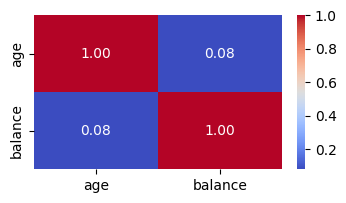

In [ ]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(4, 2))

# Generar un mapa de calor para la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Mostrar el gráfico
plt.show()

In [ ]:
# Calcular el coeficiente de correlación de Pearson entre 'age' y 'balance'
correlacion_age_balance = data[['age', 'balance']].corr()

correlacion_age_balance

El coeficiente de correlación de Pearson entre age (edad) y balance (saldo) es aproximadamente 0.080, lo que indica una correlación lineal muy débil entre estas dos variables.

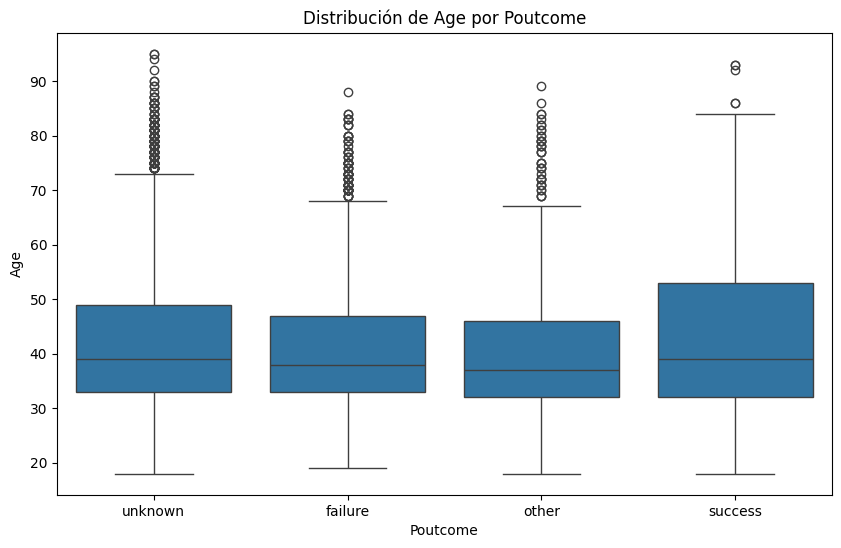

In [ ]:
# Boxplot para visualizar las distribuciones de 'age' según 'poutcome'
plt.figure(figsize=(10, 6))
sns.boxplot(x='poutcome', y='age', data=data)
plt.title('Distribución de Age por Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Age')
plt.show()


In [ ]:
# Convertir la variable 'y' de categórica a numérica
data['y_bin'] = data['y'].map({'yes': 1, 'no': 0})

# Verificar los primeros registros para confirmar el cambio
print(data[['y', 'y_bin']].head())


    y  y_bin
0  no      0
1  no      0
2  no      0
3  no      0
4  no      0


In [ ]:
def graficar_tc_bivariada(col_list, orden=None):
  tc=data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()
   #Grafica
  plt.figure(figsize=(7,4))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversion para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversion (%)')
  plt.xlim((0,1));



<ipython-input-61-9e8dba45d9e6>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


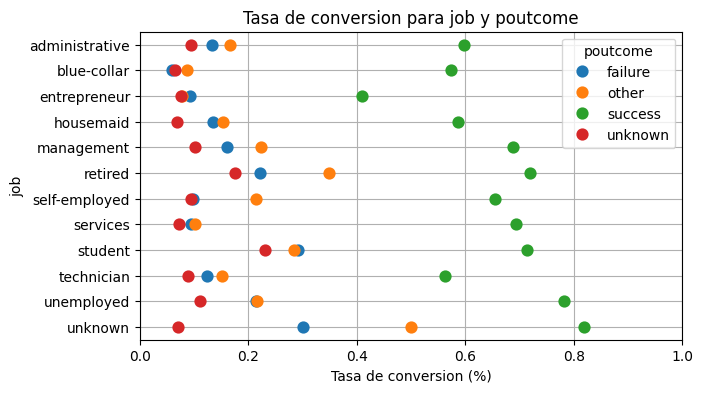

In [ ]:
graficar_tc_bivariada(['job','poutcome'])